<a href="https://colab.research.google.com/github/simulate111/Computer-Vision-and-Sensor-Fusion/blob/main/Assignment4_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Assignment 4: TKO_7096-3001 Computer Vision and Sensor Fusion


Goal: develop a RGB-Depth fusion architecture for semantic segmentation based on Fully Convolutional Network (FCN) .


<font color='red'> Deadline: 25.03.2024 at 24:00.

- Imports go here

In [1]:
!pip -q install requests beautifulsoup4
!pip -q install selenium
!apt-get update
!apt -q install chromium-chromedriver

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 492.9/492.9 kB 28.5 MB/s eta 0:00:00
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Get:2 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,679 kB]
Hit:7 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,767 kB]
Hit:9 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:10 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:11 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,698 kB]
Get:12 http://

In [4]:
!pip install -q tensorflow
!pip install -q pydot
!pip install -q opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 19.1 MB/s eta 0:00:00


In [5]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers, Model
from tensorflow.keras.utils import to_categorical, Sequence
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt
import random
import os
from google.colab import files
import zipfile
import glob
import cv2
from tensorflow.keras.callbacks import TensorBoard
import datetime
from tensorflow.keras.utils import plot_model

### Load the dataset and Ground-truth###

- Dataset consists of 1100 (per modality) images of road scenes. It is divided into train (600 images), test (200 images) and validation (300 images) datasets.
- Change the size of all images into 256*256.
- Converting the labels into one hot encoding
- Create a DataLoader for loading the files when training the model.

In [6]:
#Upload the dataset
uploaded = files.upload()
for filename in uploaded.keys():
    if filename.endswith('.zip'):
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall("/content/dataset")  # Change the path as needed
        print(f"Dataset extracted to /content/dataset")


Saving dataset.zip to dataset.zip
Dataset extracted to /content/dataset


In [7]:
"""
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import requests
import zipfile
import os
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

def download_and_extract_zip_selenium(url, extract_path="/content/dataset"):
    #Downloads and extracts a zip file from a SharePoint URL using Selenium.

    chrome_options = Options()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')

    driver = webdriver.Chrome(options=chrome_options)
    driver.get(url)

    # 1. Inspect and Print Page Source (for debugging)
    print(driver.page_source)  # Print the HTML to examine the structure

    # 2. Find the Download Button (replace with your actual selector)
    try:
        wait = WebDriverWait(driver, 10)
        # Example: Using CSS Selector (adjust as needed)
        download_button = wait.until(EC.element_to_be_clickable((By.CSS_SELECTOR, "button[data-automationid='downloadButton']")))  # Example selector
        download_link = download_button.get_attribute('href')

        # (Optional) Take a screenshot after finding the element
        driver.save_screenshot("download_button_found.png")

    except Exception as e:
        print(f"Error finding download link: {e}")
        driver.save_screenshot("download_button_error.png")  # Take a screenshot if an error occurs
        driver.quit()
        return

    driver.quit()

    # 3. Download and Extract
    zip_filename = os.path.join(extract_path, "dataset.zip")
    response = requests.get(download_link, stream=True)
    with open(zip_filename, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)

    with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print(f"Dataset extracted to {extract_path}")

# Example usage
url = "https://utufi-my.sharepoint.com/:u:/g/personal/moakht_utu_fi/EbBVU01QQ8ZInxQy52BEB58BqmAdE6age2qvZi44hOOMCQ?e=mUGRyn"
download_and_extract_zip_selenium(url)
"""

'\nfrom selenium import webdriver\nfrom selenium.webdriver.chrome.options import Options\nimport requests\nimport zipfile\nimport os\nfrom selenium.webdriver.support.ui import WebDriverWait\nfrom selenium.webdriver.support import expected_conditions as EC\nfrom selenium.webdriver.common.by import By\n\ndef download_and_extract_zip_selenium(url, extract_path="/content/dataset"):\n    #Downloads and extracts a zip file from a SharePoint URL using Selenium.\n\n    chrome_options = Options()\n    chrome_options.add_argument(\'--headless\')\n    chrome_options.add_argument(\'--no-sandbox\')\n    chrome_options.add_argument(\'--disable-dev-shm-usage\')\n\n    driver = webdriver.Chrome(options=chrome_options)\n    driver.get(url)\n\n    # 1. Inspect and Print Page Source (for debugging)\n    print(driver.page_source)  # Print the HTML to examine the structure\n\n    # 2. Find the Download Button (replace with your actual selector)\n    try:\n        wait = WebDriverWait(driver, 10)\n        #

In [8]:
# Verify the file
extracted_files = os.listdir("/content/dataset")
print("Extracted files:", extracted_files)

Extracted files: ['dataset']


In [9]:


# Base dataset directory (adjusted for nested structure)
base_dir = '/content/dataset/dataset'

# Function to get .npy file paths for a specific split (train/test/validation) and modality (rgb/depth/label)
def get_npy_paths(split, modality):
    return sorted(glob.glob(os.path.join(base_dir, split, modality, '*.npy')))

# Load paths for training, validation, and testing datasets
rgb_train_paths = get_npy_paths('train', 'rgb')
depth_train_paths = get_npy_paths('train', 'depth')
label_train_paths = get_npy_paths('train', 'label')

rgb_val_paths = get_npy_paths('validation', 'rgb')
depth_val_paths = get_npy_paths('validation', 'depth')
label_val_paths = get_npy_paths('validation', 'label')

rgb_test_paths = get_npy_paths('test', 'rgb')
depth_test_paths = get_npy_paths('test', 'depth')
label_test_paths = get_npy_paths('test', 'label')

# Quick check to confirm paths are loaded
print(f"Train RGB: {len(rgb_train_paths)}, Depth: {len(depth_train_paths)}, Labels: {len(label_train_paths)}")
print(f"Validation RGB: {len(rgb_val_paths)}, Depth: {len(depth_val_paths)}, Labels: {len(label_val_paths)}")
print(f"Test RGB: {len(rgb_test_paths)}, Depth: {len(depth_test_paths)}, Labels: {len(label_test_paths)}")

Train RGB: 600, Depth: 600, Labels: 600
Validation RGB: 100, Depth: 100, Labels: 100
Test RGB: 200, Depth: 200, Labels: 200


In [10]:
!pip -q install opencv-python

In [11]:
class DataLoader(Sequence):
    def __init__(self, rgb_paths, depth_paths, label_paths, batch_size, num_classes=19, target_size=(256, 256), normalize=True):
        self.rgb_paths = rgb_paths
        self.depth_paths = depth_paths
        self.label_paths = label_paths
        self.batch_size = batch_size
        self.num_classes = num_classes
        self.target_size = target_size
        self.normalize = normalize

    def __len__(self):
        return int(np.floor(len(self.rgb_paths) / self.batch_size))

    def __getitem__(self, idx):
        batch_rgb = self.rgb_paths[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_depth = self.depth_paths[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_labels = self.label_paths[idx * self.batch_size:(idx + 1) * self.batch_size]
        return self.__generate_data(batch_rgb, batch_depth, batch_labels)

    def __generate_data(self, batch_rgb_files, batch_depth_files, batch_label_files):
        rgb_images = np.array([cv2.resize(np.load(file), self.target_size) for file in batch_rgb_files])
        depth_images = np.array([cv2.resize(np.concatenate([np.load(file), np.load(file), np.load(file)], axis=-1), self.target_size) for file in batch_depth_files])
        if self.normalize:
            rgb_images = rgb_images / 255.0
            depth_images = depth_images / 255.0  # Normalize depth images as well
        labels = np.array([cv2.resize(to_categorical(np.load(file), num_classes=self.num_classes), self.target_size) for file in batch_label_files])
        labels = labels.reshape(labels.shape[0], -1, labels.shape[-1])
        return (rgb_images, depth_images), labels

In [12]:
batch_size = 3
data_loader = DataLoader(rgb_train_paths, depth_train_paths, label_train_paths, batch_size, normalize=False)

- Visualize the data you have prepared

In [13]:
def visualize_samples(rgb_images, depth_images, labels):
    num_samples = len(rgb_images)
    fig, axes = plt.subplots(num_samples, 3, figsize=(15, 5 * num_samples))
    for i in range(num_samples):
        axes[i, 0].imshow(rgb_images[i])
        axes[i, 0].set_title("RGB Image")
        axes[i, 0].axis("off")
        axes[i, 1].imshow(depth_images[i], cmap='viridis')
        axes[i, 1].set_title("Depth Image")
        axes[i, 1].axis("off")
        print("Shape of labels array:", labels[i].shape)

        reshaped_labels = labels[i].reshape(256, 256, 19).argmax(axis=-1) #Added Argmax to get the class index.
        axes[i, 2].imshow(reshaped_labels)
        axes[i, 2].set_title("Labels")
        axes[i, 2].axis("off")
    plt.tight_layout()
    plt.show()

In [14]:
print(np.load(rgb_train_paths[0]).shape)
print(np.load(depth_train_paths[0]).shape)
print(np.load(label_train_paths[0]).shape)

(128, 256, 3)
(128, 256, 1)
(128, 256)


In [15]:
depth_train_data = [np.load(path) for path in depth_train_paths]
rgb_train_data = [np.load(path) for path in rgb_train_paths]
label_train_data = [np.load(path) for path in label_train_paths]
modified_depth_data = []
for depth_img in depth_train_data:
    modified_depth_data.append(np.concatenate([depth_img, depth_img, depth_img], axis=-1))
modified_rgb_data = []
for rgb_img in rgb_train_data:
    modified_rgb_data.append(rgb_img)

print(modified_depth_data[0].shape)
print(modified_rgb_data[0].shape)
print(label_train_data[0].shape)

(128, 256, 3)
(128, 256, 3)
(128, 256)


Shape of labels array: (65536, 19)
Shape of labels array: (65536, 19)
Shape of labels array: (65536, 19)


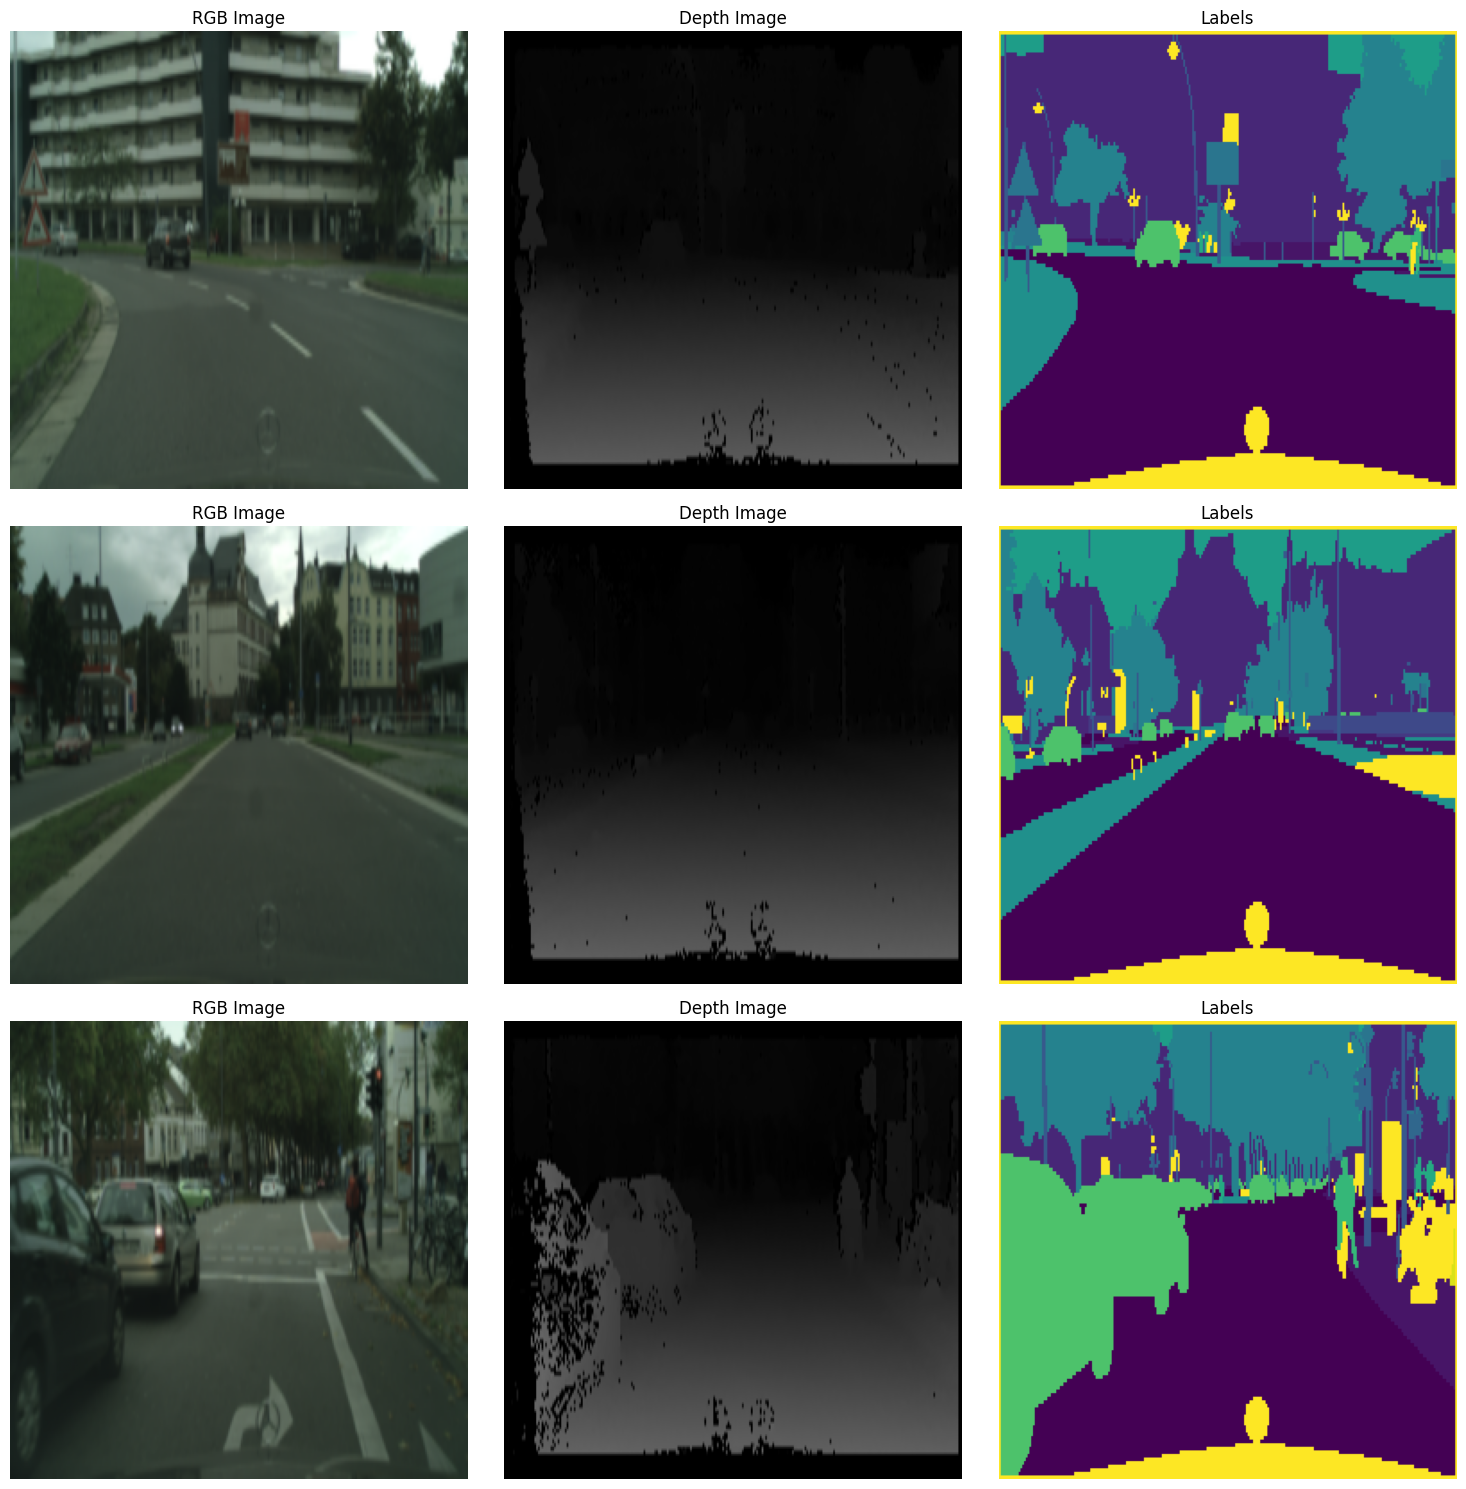

In [16]:
#first batch
(data_rgb, data_depth), data_labels = data_loader[0]
visualize_samples(data_rgb, data_depth, data_labels)

 Define a Fully Convolutional Network (FCN) for image segmentaion by fusing RGB and depth images. The network consists of  two sterams which each stream has following layers:

    1. Use the pretrained ResNet50 on imageNet
    2. Add two Conv layers with 128 and 256 nodes, respectively. Kernel size (3,3), stride (1,1)
    3. Top of the Conv layers, add dropout layer with 0.2
    4. Concatenate two streams.
    5. Add a transposed convolution layer (Conv2DTranspose)  with Kernel size (64,64), stride (32,32)
    6. Add a softmax activation layer
    
 You can find the model summary and structure in the PDF file.


In [42]:
class UniqueResNet50(layers.Layer):
    def __init__(self, **kwargs):
        super(UniqueResNet50, self).__init__(**kwargs)
        self.resnet = ResNet50(weights='imagenet', include_top=False)
        for layer in self.resnet.layers:
            layer.trainable = False

    def call(self, inputs):
        return self.resnet(inputs)

def build_fcn_segmentation_model(input_shape=(256, 256, 3), num_classes=19):
    input_rgb = layers.Input(shape=input_shape, name="input_rgb")
    input_depth = layers.Input(shape=input_shape, name="input_depth")
    rgb_stream = UniqueResNet50()(input_rgb)
    depth_stream = UniqueResNet50()(input_depth)

    rgb_stream = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(rgb_stream)
    rgb_stream = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(rgb_stream)
    rgb_stream = layers.Dropout(0.2)(rgb_stream)
    depth_stream = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(depth_stream)
    depth_stream = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(depth_stream)
    depth_stream = layers.Dropout(0.2)(depth_stream)

    concatenated = layers.Concatenate()([rgb_stream, depth_stream])
    upsampled = layers.Conv2DTranspose(num_classes, (64, 64), strides=(32, 32), padding='same')(concatenated)
    reshaped = layers.Reshape((-1, num_classes))(upsampled)
    output = layers.Activation('softmax')(reshaped)
    model = Model(inputs=[input_rgb, input_depth], outputs=output)
    model.input_rgb = input_rgb
    model.input_depth = input_depth

    return model

In [18]:
input_layer = layers.Input(shape=(10,))
hidden_layer = layers.Dense(5, activation='relu')(input_layer)
output_layer = layers.Dense(1, activation='sigmoid')(hidden_layer)
model = Model(inputs=input_layer, outputs=output_layer)

In [43]:
model = build_fcn_segmentation_model()

In [20]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [21]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_rgb (InputLayer)    │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ input_depth (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ unique_res_net50          │ (None, 8, 8, 2048)     │     23,587,712 │ input_rgb[0][0]        │
│ (UniqueResNet50)          │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ unique_res_net50_1        │ (None, 8, 8, 2048)     │     23,587,712 │ input_depth[0][0]      │
│ (UniqueResNet50)          │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 8, 8, 128)      │      2,359,424 │ unique_res_net50[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 8, 8, 128)      │      2,359,424 │ unique_res_net50_1[0]… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 8, 8, 256)      │        295,168 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 8, 8, 256)      │        295,168 │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 8, 8, 256)      │              0 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_1 (Dropout)       │ (None, 8, 8, 256)      │              0 │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 8, 8, 512)      │              0 │ dropout[0][0],         │
│                           │                        │                │ dropout_1[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_transpose          │ (None, 256, 256, 19)   │     39,845,907 │ concatenate[0][0]      │
│ (Conv2DTranspose)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ reshape (Reshape)         │ (None, 65536, 19)      │              0 │ conv2d_transpose[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 65536, 19)      │              0 │ reshape[0][0]          │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 92,330,515 (352.21 MB)

 Trainable params: 45,155,091 (172.25 MB)

 Non-trainable params: 47,175,424 (179.96 MB)

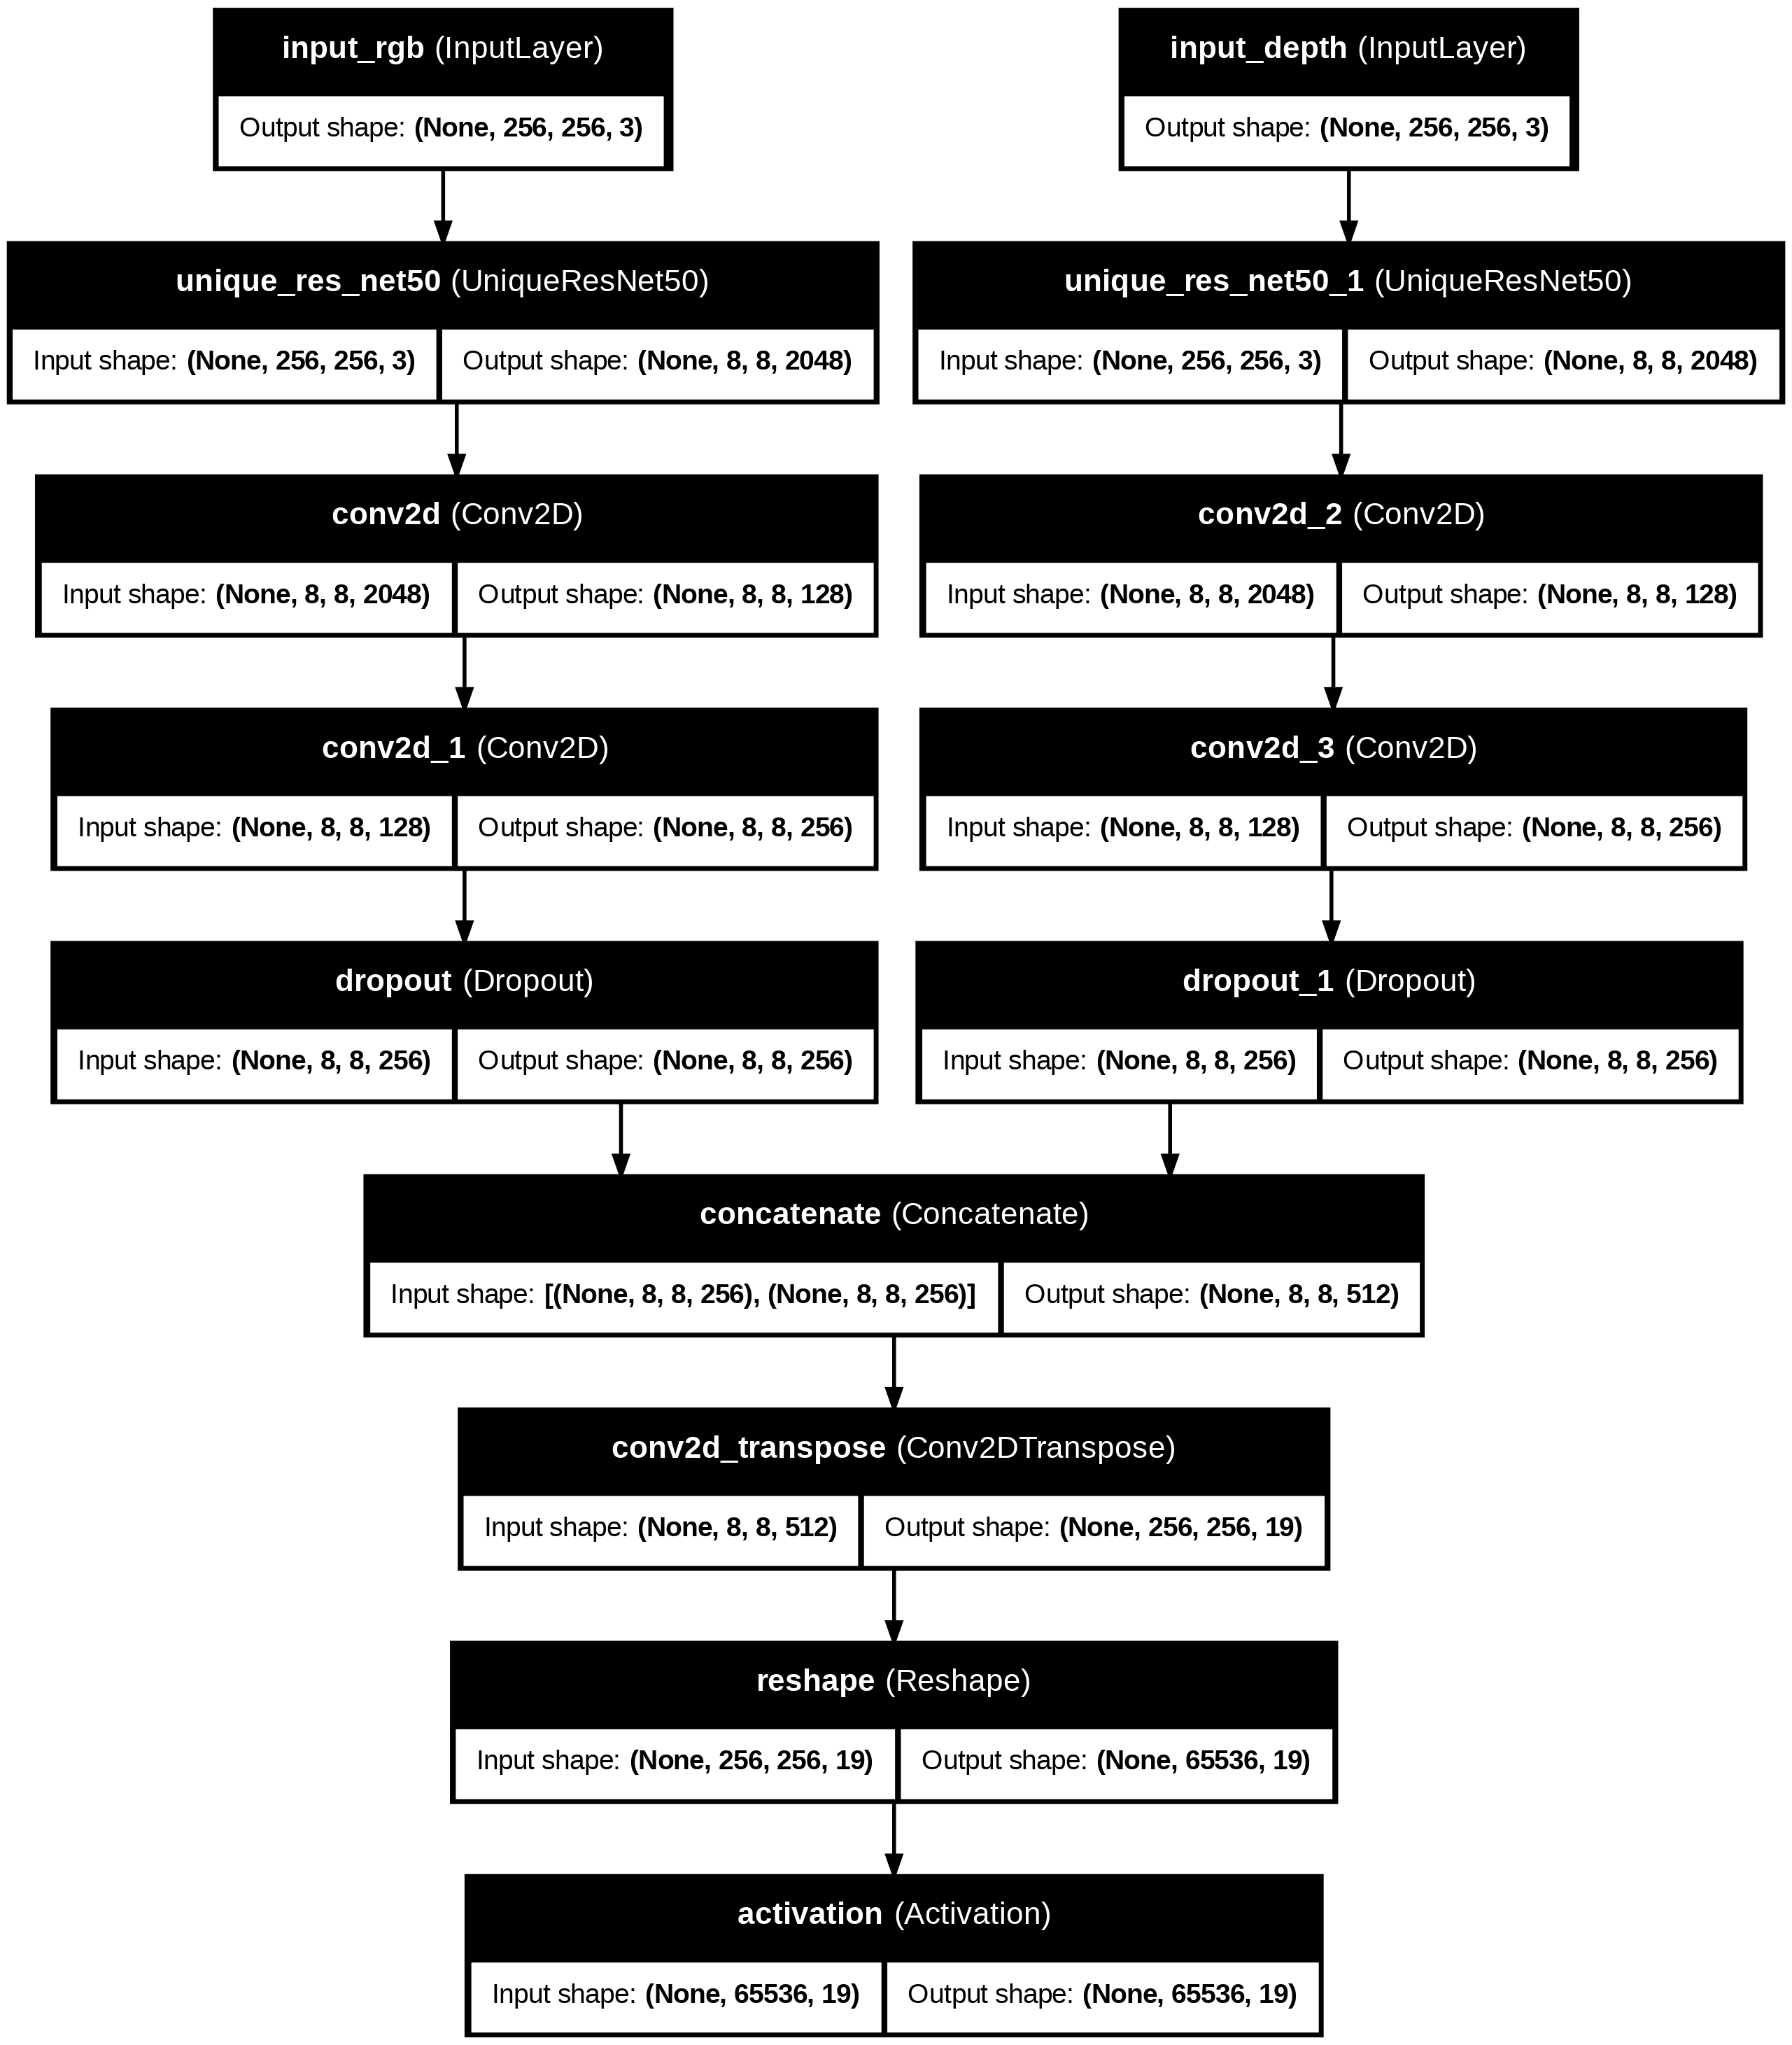

In [22]:
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Compile the model with SGD(learning_rate=0.01, decay=1e-5, momentum=0.9) and loss="categorical_crossentropy"

Train the model on the “train” dataset  and “validation”dataset for epochs =10.

In [23]:
optimizer = optimizers.SGD(learning_rate=0.008, decay=1e-6, momentum=0.9)
model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [24]:
#loaders
batch_size = 16
train_loader = DataLoader(rgb_train_paths, depth_train_paths, label_train_paths, batch_size)
val_loader = DataLoader(rgb_val_paths, depth_val_paths, label_val_paths, batch_size)

In [25]:
def generator(data_loader):
  for idx in range(len(data_loader)):
    yield data_loader.__getitem__(idx)

In [26]:
#Tensorflow datasets
train_dataset = tf.data.Dataset.from_generator(
    lambda: generator(train_loader),
    output_types=((tf.float32, tf.float32), tf.float32),
    output_shapes=(((batch_size, 256, 256, 3), (batch_size, 256, 256, 3)), (batch_size, 65536, 19)))
val_dataset = tf.data.Dataset.from_generator(
    lambda: generator(val_loader),
    output_types=((tf.float32, tf.float32), tf.float32),
    output_shapes=(((batch_size, 256, 256, 3), (batch_size, 256, 256, 3)), (batch_size, 65536, 19)))

In [27]:
epochs = 10
steps_per_epoch = len(train_loader)
validation_steps = len(val_loader)
model.fit(train_dataset, validation_data=val_dataset,
          epochs=epochs, steps_per_epoch = steps_per_epoch,
          validation_steps = validation_steps, callbacks=[tensorboard_callback])

Epoch 1/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 750s 20s/step - accuracy: 0.2162 - loss: 2.8420 - val_accuracy: 0.3257 - val_loss: 2.1187
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


37/37 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3257 - val_loss: 2.1187
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 728s 20s/step - accuracy: 0.4248 - loss: 1.8786 - val_accuracy: 0.5362 - val_loss: 1.6092
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 91s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5362 - val_loss: 1.6092
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 727s 20s/step - accuracy: 0.5383 - loss: 1.4743 - val_accuracy: 0.5547 - val_loss: 1.4637
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5547 - val_loss: 1.4637
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 732s 20s/step - accuracy: 0.5514 - loss: 1.3639 - val_accuracy: 0.5501 - val_loss: 1.4114
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 92s 2s/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5501 - val_loss: 1.4114
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 728s 20s/step - accuracy: 0.5560 - loss: 1.3130 - val

 Evaluate the model on the training and test dataset. The results must be shown as

- Print loss and accuracy of model for  test dataset.

- Predict semantically segmented images on 5 random example of test dataset.

- Visualize the 5 random examples alongside the ground truth and prediction.

In [28]:
# Evaluation
loss, accuracy = model.evaluate(val_dataset)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

6/6 ━━━━━━━━━━━━━━━━━━━━ 61s 10s/step - accuracy: 0.5509 - loss: 1.3286
Test Loss: 1.1834344863891602
Test Accuracy: 0.4723697304725647


In [55]:
idx = 0
print(rgb_val_paths[idx])
print(depth_val_paths[idx])

/content/dataset/dataset/validation/rgb/200.npy
/content/dataset/dataset/validation/depth/200.npy


In [32]:
print(model.input_shape)

[(None, 256, 256, 3), (None, 256, 256, 3)]


In [51]:
print("RGB Input Shape:", model.input_rgb.shape)
print("Depth Input Shape:", model.input_depth.shape)

RGB Input Shape: (None, 256, 256, 3)
Depth Input Shape: (None, 256, 256, 3)


In [53]:
"""
#3 channels
depth_input_data = np.random.rand(256, 256)
depth_input_data = np.repeat(depth_input_data[..., np.newaxis], 3, axis=-1)
print("Depth Input Shape:", depth_input_data.shape)
"""

'\n#3 channels \ndepth_input_data = np.random.rand(256, 256)\ndepth_input_data = np.repeat(depth_input_data[..., np.newaxis], 3, axis=-1)\nprint("Depth Input Shape:", depth_input_data.shape)\n'

In [57]:
print("RGB Input Shape:", model.input_rgb.shape)
print("Depth Input Shape:", model.input_depth.shape)

RGB Input Shape: (None, 256, 256, 3)
Depth Input Shape: (None, 256, 256, 3)


In [61]:
random_indices = np.random.choice(len(rgb_val_paths), size=5, replace=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


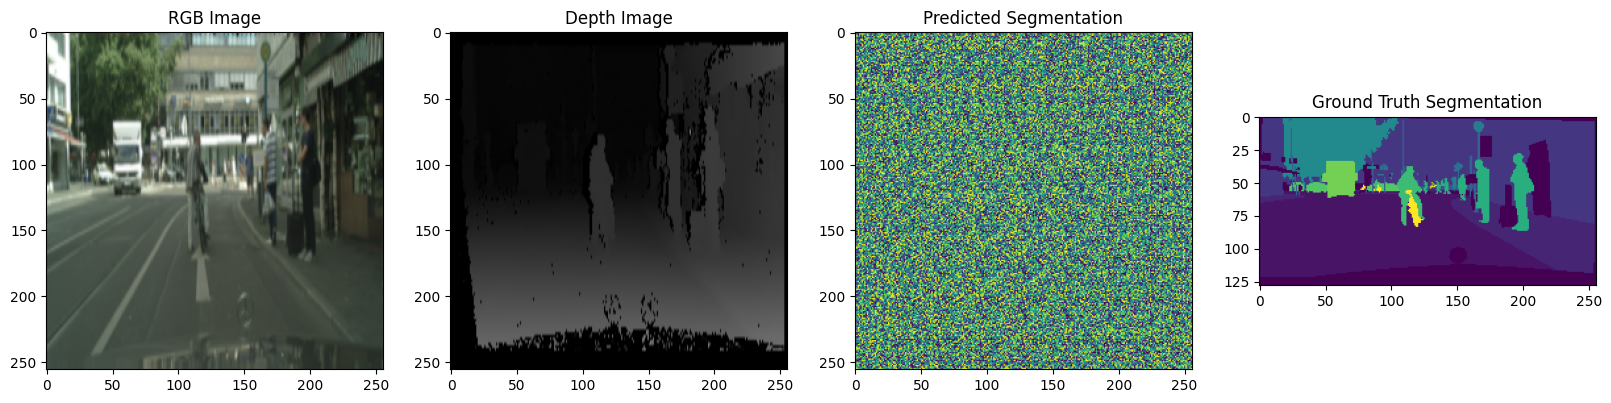

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


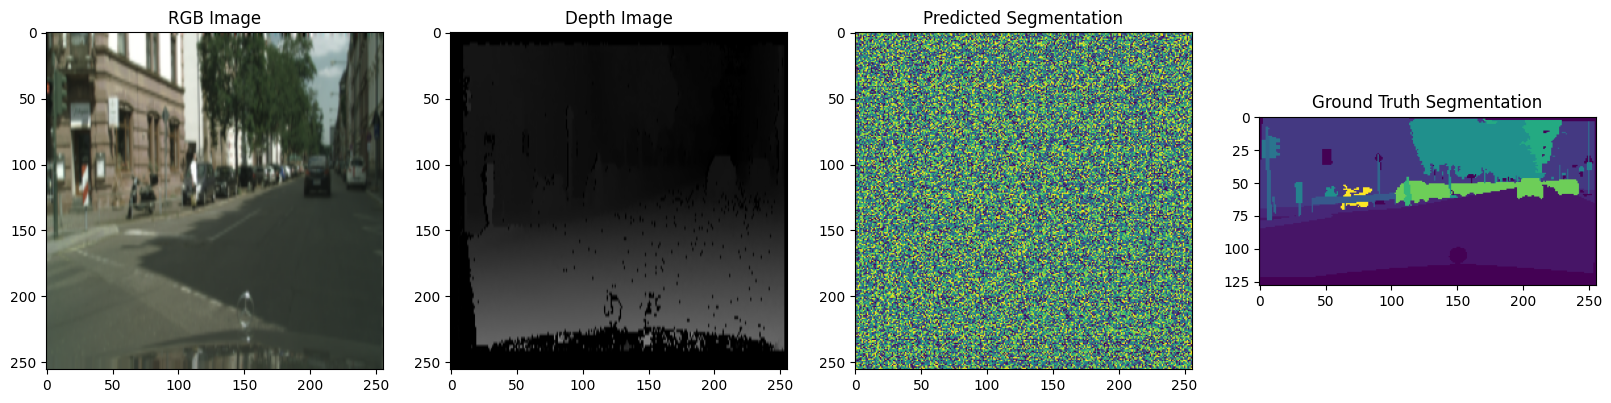

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


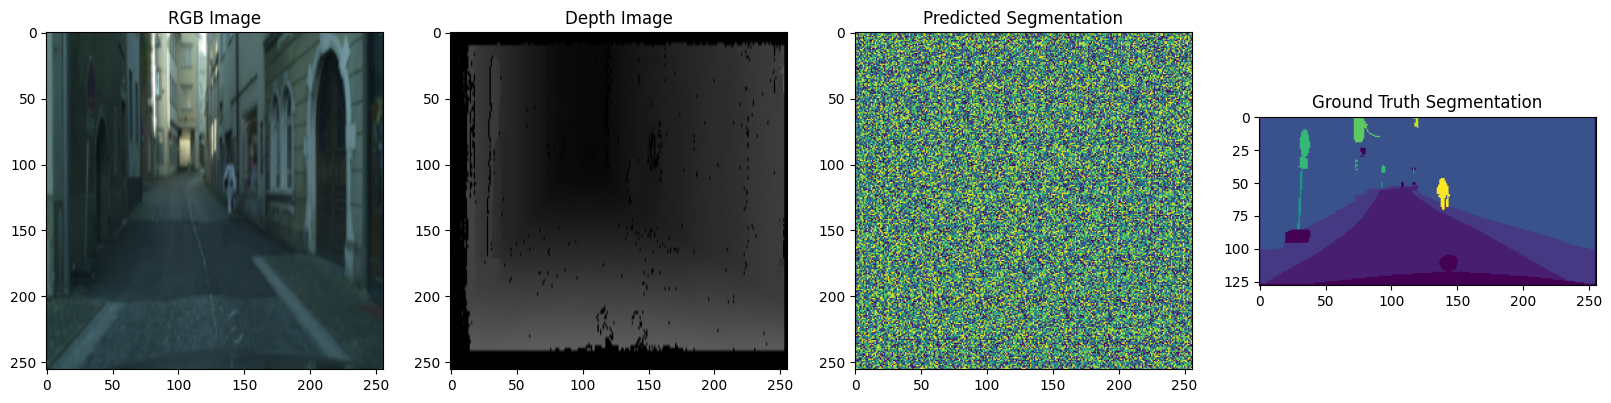

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


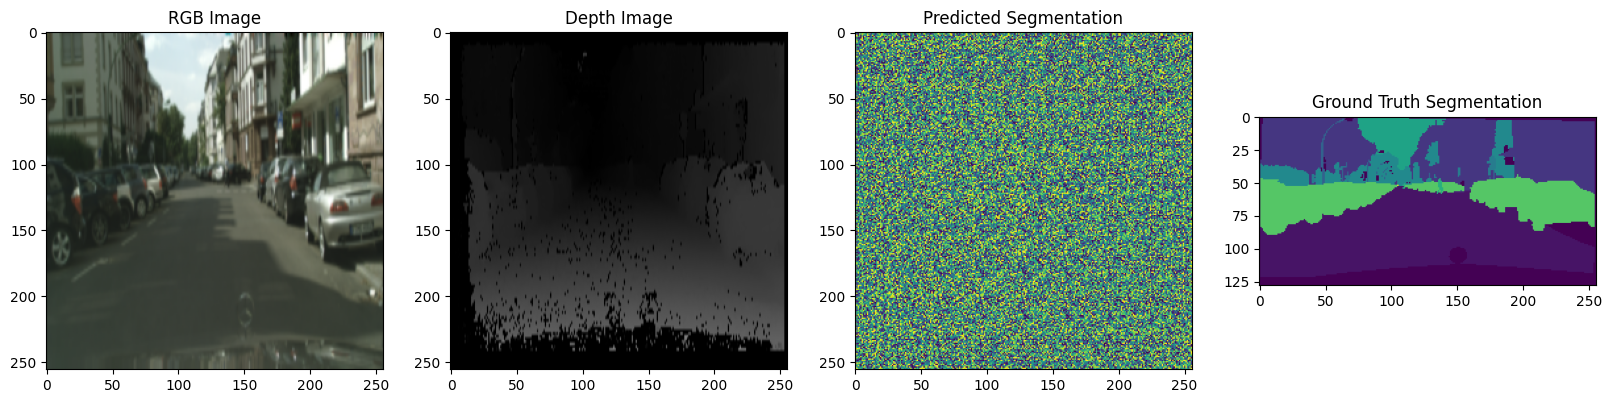

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


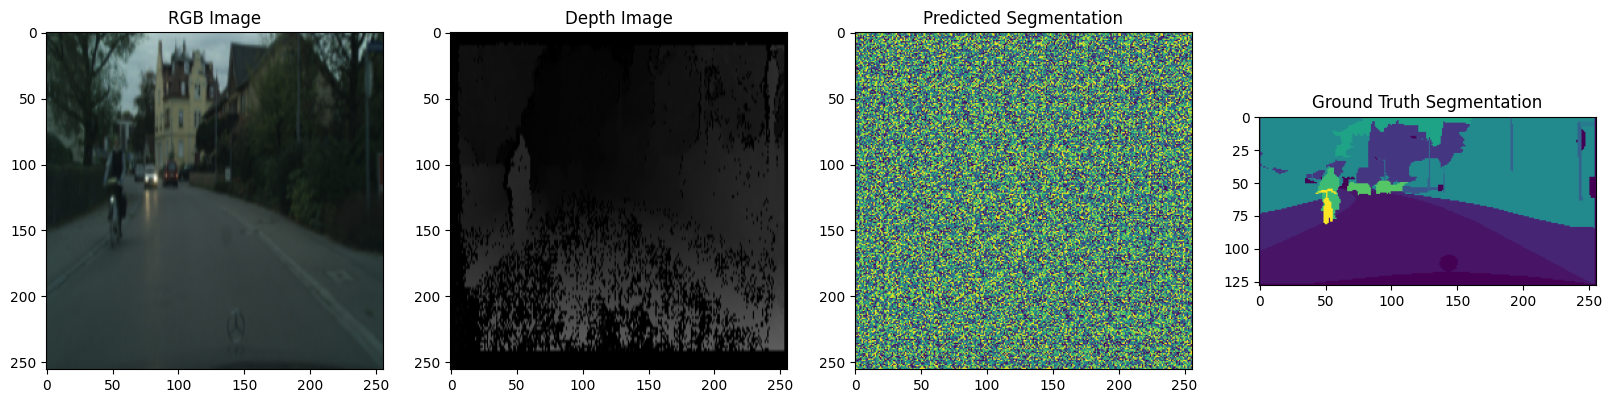

In [65]:
for i in random_indices:
    rgb_image = np.load(rgb_val_paths[i])
    rgb_image = cv2.resize(rgb_image, (256, 256))
    rgb_input = np.expand_dims(rgb_image, axis=0)
    depth_image = np.load(depth_val_paths[i])
    if len(depth_image.shape) == 2:
        depth_image = np.repeat(depth_image[..., np.newaxis], 3, axis=-1)
    elif depth_image.shape[-1] == 1:
        depth_image = np.repeat(depth_image, 3, axis=-1)

    depth_image_resized = cv2.resize(depth_image, (256, 256))
    depth_input = np.expand_dims(depth_image_resized, axis=0)
    ground_truth = np.load(label_val_paths[i])
    prediction = model.predict([rgb_input, depth_input])
    predicted_labels = np.argmax(prediction.squeeze(), axis=-1)
    predicted_labels = predicted_labels.reshape((256, 256))
    plt.figure(figsize=(20, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(rgb_image)
    plt.title("RGB Image")
    plt.subplot(1, 4, 2)
    plt.imshow(depth_image_resized)
    plt.title("Depth Image")
    plt.subplot(1, 4, 3)
    plt.imshow(predicted_labels)
    plt.title("Predicted Segmentation")
    plt.subplot(1, 4, 4)
    plt.imshow(ground_truth)
    plt.title("Ground Truth Segmentation")
    plt.show()

### Extra 5 points :

Implement FCNs for each sing modality and compare their accuracy with fusion model. I need the result of the following table in the same notebook.

# RESULT

| **Modality** | **Test Accuracy(%)** |
| -------- | -------- |
| RGB only |  |
| Depth Only |  |
| RBB and Depth Fusion |  |